# Single Neuron Linear Regression 

[Concrete Compressive Strength DataSet](https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength)

Task: Predict concrete comprensive strength in MPa (Mega Pascals) given a number of features such as cement, ash, water etc. 

In [17]:
#import relevant packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [8]:
#import data from local directory
df = pd.read_csv("dataset/Concrete_Data.csv")

# Data Visualization

   Cement   Slag  Ash  Water  Superplasticizer  Coarse   Fine  Age  Strength
0   540.0    0.0  0.0  162.0               2.5  1040.0  676.0   28     79.99
1   540.0    0.0  0.0  162.0               2.5  1055.0  676.0   28     61.89
2   332.5  142.5  0.0  228.0               0.0   932.0  594.0  270     40.27
3   332.5  142.5  0.0  228.0               0.0   932.0  594.0  365     41.05
4   198.6  132.4  0.0  192.0               0.0   978.4  825.5  360     44.30
Target Variable is Strength (Compressive strength of Concrete in MPa)


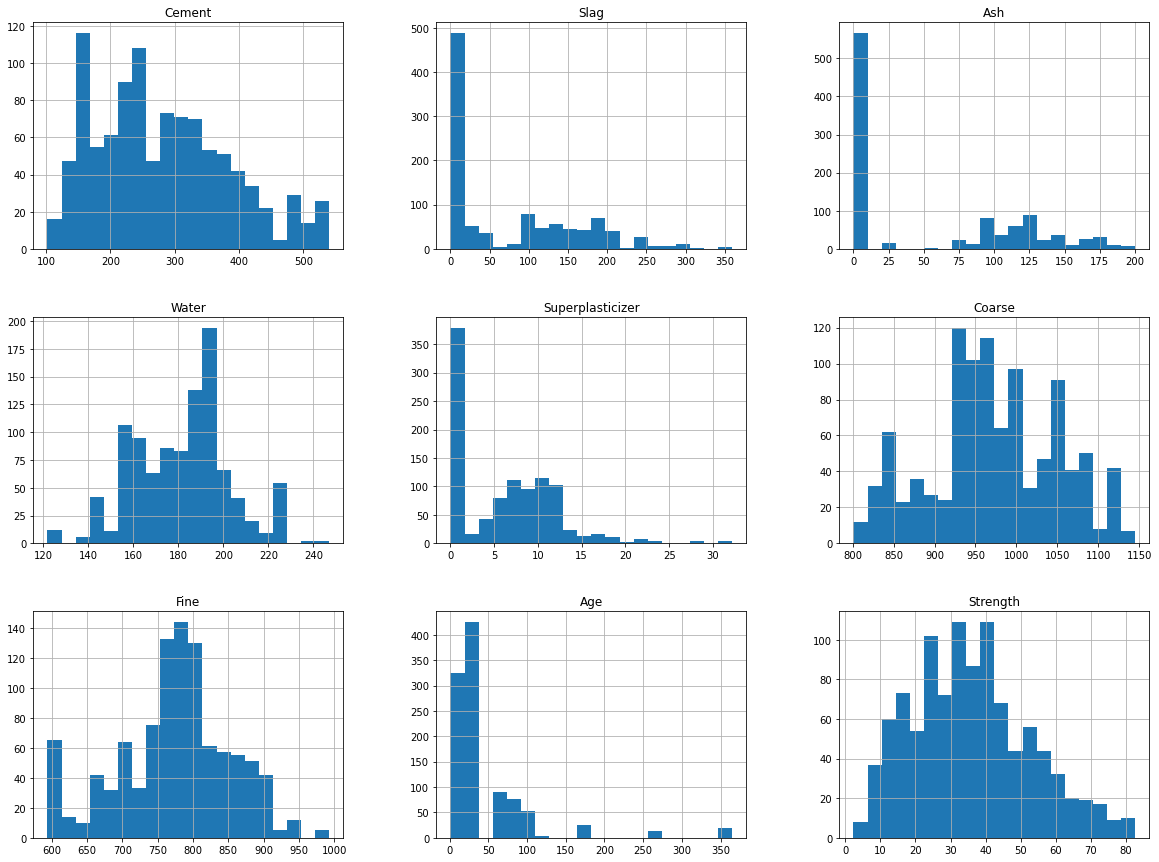

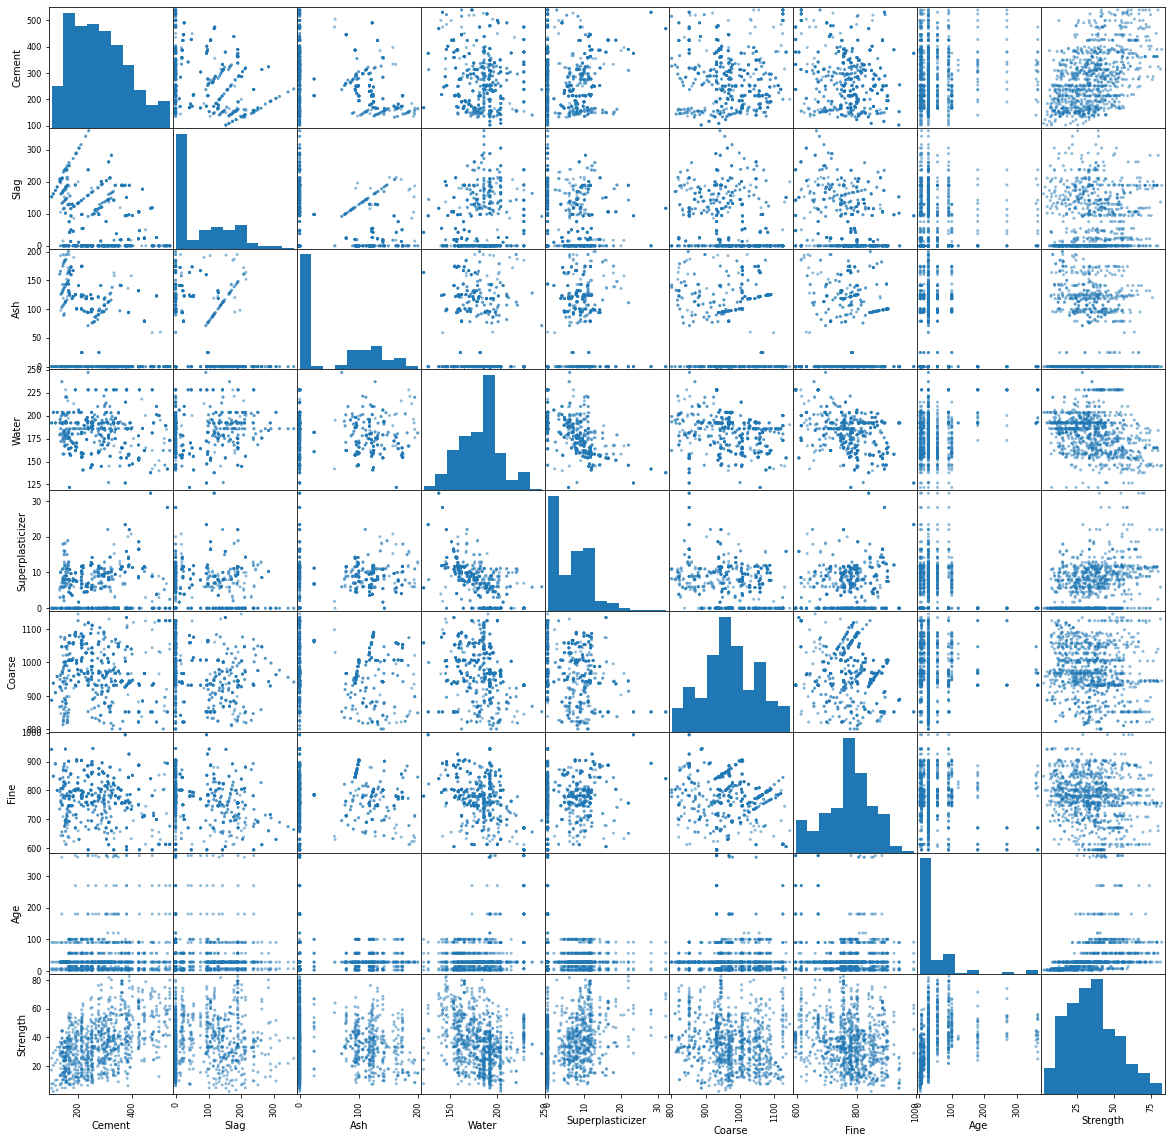

In [10]:
# Show the first 5 rows of the dataset
print(df.head())
print("Target Variable is Strength (Compressive strength of Concrete in MPa)")
# Generate relevant plots
df.hist(bins=20, figsize=(20,15))
plt.show()

pd.plotting.scatter_matrix(df, figsize=(20,20))
plt.show()

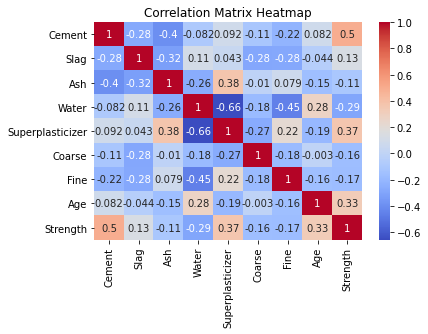

In [11]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

From the plots, we can see that the variables have different ranges and distributions. For example, the cement and slag variables have a high concentration of data around their respective means, while the superplastic and age variables have a more even distribution. From the given plots, we can make the following observations:

1. The distribution of the target variable, compressive strength, is somewhat normal, but it has some skewness towards the right.
2. The correlation matrix and heatmap show that some features have a strong positive or negative correlation with the target variable, while others are weakly correlated or not correlated at all.

Overall, it looks like there could be some linear relationships between the variables, which could make them good candidates for a linear regression model.


# Build Model and Train

In [19]:
class LinearRegression:
    def __init__(self):
        self.weight = None
        self.loss = []
        
    def fit(self, X, y, learning_rate = 0.01, epochs = 1000):
        m, n = X.shape
        self.weight = np.zeros((n, 1))
        
        for i in range(epochs):
            h = np.dot(X, self.weight)
            error = h - y
            gradient = np.dot(X.T, error) / m
            self.weight -= learning_rate * gradient
            mse = np.mean(error ** 2)
            self.loss.append(mse)
            
    def predict(self, X):
        return np.dot(X, self.weight)

In [20]:
#Split data into target (y) and features (X)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values.reshape(-1, 1)
# Split dataset for test/train 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


In [21]:
# Add bias term
X_train = np.insert(X_train, 0, 1, axis=1)
X_test = np.insert(X_test, 0, 1, axis=1)
# Train model
model = LinearRegression()
model.fit(X_train, y_train, learning_rate = 0.01, epochs = 1000)

## Evaluate Perfromance

In [22]:
# Evaluate model
y_pred = model.predict(X_test)
mse = np.mean((y_test - y_pred) ** 2)
print("Test MSE:", mse)

Test MSE: 98.27306467008327


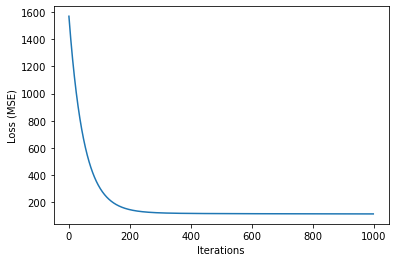

In [23]:
# Plot loss
plt.plot(model.loss)
plt.xlabel('Iterations')
plt.ylabel('Loss (MSE)')
plt.show()

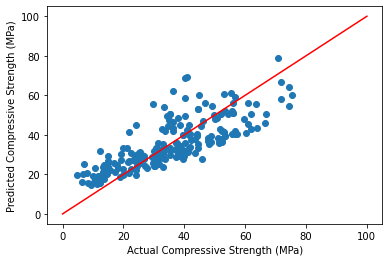

In [24]:
# Plot actual vs predicted
plt.scatter(y_test, y_pred)
plt.plot([0, 100], [0, 100], color='red')
plt.xlabel('Actual Compressive Strength (MPa)')
plt.ylabel('Predicted Compressive Strength (MPa)')
plt.show()

The single neuron provides a satisfactory fit. However, adding more neurons will significantly enhane the accuracy of the regression fit.